In [1]:
import numpy as np
import iris
import iris.plot as iplt
import iris.coord_categorisation as ccad
import matplotlib.pyplot as plt
from cartopy import crs
from datetime import datetime, timedelta

iris.FUTURE.netcdf_promote = True
iris.FUTURE.cell_datetime_objects = True

In [2]:
%matplotlib nbagg

In [4]:
def delay(cube, dt):
    x = cube.copy()
    t = x.coord(axis='t')
    d = x.coord_dims(t.name())[0]
    n = t.units.num2date(t.points) + dt
    x.remove_coord(t.name())
    x.add_dim_coord(
        iris.coords.DimCoord(t.units.date2num(n), 
                             units=t.units, 
                             **{s: getattr(t, s) for s in ['standard_name', 'long_name', 'var_name']}), d)
    return x

def xtr(cube, h):
    x = cube.copy().extract(iris.Constraint(hour = h))
    x.remove_coord('hour')
    return x

In [5]:
x = iris.load('../../data/analyses/ERA/ERA-ppt-SH.nc')[0]

In [20]:
y = delay(x, timedelta(hours=-1)) # because 0h has the accumulation of the previous 12h
ccad.add_hour(y, 'time', 'hour')
ccad.add_day_of_year(y, 'time', 'day')
ccad.add_year(y, 'time', 'year')
ccad.add_month(y, 'time', 'month')
ccad.add_season(y, 'time', 'season')
y.remove_coord('time')

In [21]:
ppt = xtr(y, 23) + xtr(y, 11)

In [8]:
proj = crs.SouthPolarStereo()

In [22]:
m = x.collapsed('time', iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


<IPython.core.display.Javascript object>


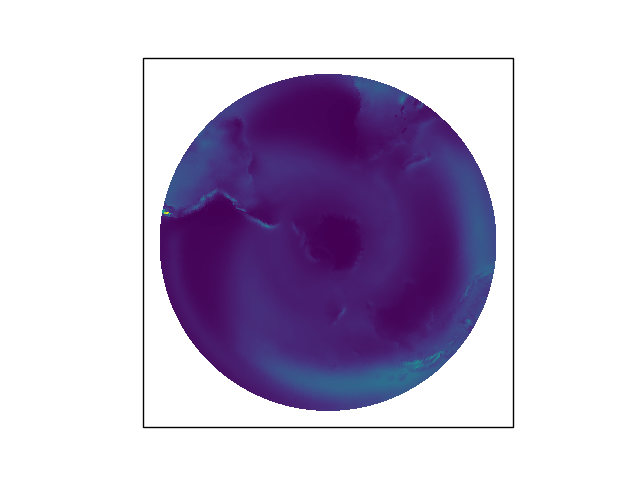

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:826: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:826: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


In [10]:
fig = plt.figure()
plt.subplot(1, 1, 1, projection=proj)

iplt.pcolormesh(m)

In [46]:
x = iris.load('../../data/analyses/gl_union_mes.nc', 'geopotential')[0] / 9.8

In [49]:
ccad.add_season(x, 'time', 'season')

In [51]:
winter = x.extract(iris.Constraint(season='jja'))

In [52]:
x1 = winter.extract(iris.Constraint(time = lambda t: t < datetime(1990,1,1))).collapsed('time', iris.analysis.MEAN)
x2 = winter.extract(iris.Constraint(time = lambda t: t > datetime(2000,1,1))).collapsed('time', iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [53]:
t = winter.coord('time')
t = t.units.num2date(t.points).astype('datetime64')

<IPython.core.display.Javascript object>


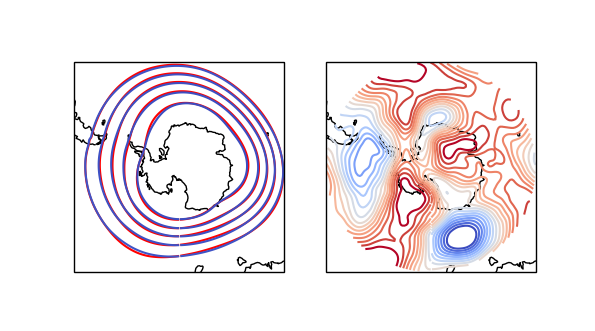

In [55]:
lvls = np.arange(5000,5500,100)

fig = plt.figure()
plt.subplot(1, 2, 1, projection=proj)
iplt.contour(x1, levels=lvls, colors=['r'])
p = iplt.contour(x2, levels=lvls, colors=['y'])
p.ax.coastlines()
plt.subplot(1, 2, 2, projection=proj)
plt.set_cmap('coolwarm')
p = iplt.contour(x2-x1, range(-16, 16, 2))
p.ax.coastlines()

In [56]:
x1 = x.extract(iris.Constraint(time = lambda t: t < datetime(1990,1,1))).collapsed('time', iris.analysis.MEAN)
x2 = x.extract(iris.Constraint(time = lambda t: t > datetime(2000,1,1))).collapsed('time', iris.analysis.MEAN)

/home/arno/Documents/code/conda/envs/iris/lib/python3.6/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


<IPython.core.display.Javascript object>


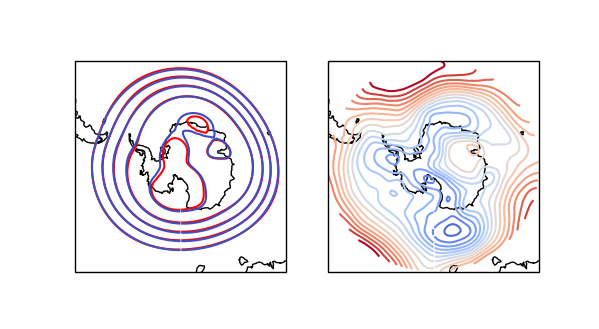

In [57]:
lvls = np.arange(5000,5500,100)

fig = plt.figure()
plt.subplot(1, 2, 1, projection=proj)
iplt.contour(x1, levels=lvls, colors=['r'])
p = iplt.contour(x2, levels=lvls, colors=['y'])
p.ax.coastlines()
plt.subplot(1, 2, 2, projection=proj)
plt.set_cmap('coolwarm')
p = iplt.contour(x2-x1, range(-16, 16, 2))
p.ax.coastlines()